In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yt
yt.set_log_level(50)
plt.style.use('mplstyle')

# Fluctuating Lattice Boltzmann in AMReX

## Lattice Boltzmann equation

\begin{align}
f_i(\vec{x}+h\vec{c}_i,t+h) = f_i^*(\vec{x},t) &\\
f_i^*(\vec{x},t) &= f_i^{eq} + \left(1-\frac{h}{\tau}\right)\left( f_i - f_i^{eq}\right)
\end{align}

### Equilibrium distribution

\begin{equation}
f_i^{eq} = w_i \rho \left( 1 + \frac{\vec{u}\cdot\vec{c}_i}{c_s^2} + \frac{\vec{u}\vec{u}\ \colon \left( \vec{c}_i\vec{c}_i - c_s^2 \mathsf{1} \right)}{2c_s^4} \right)
\end{equation}

### Hydrodynamic moments

\begin{align}
\rho &= \sum_i f_i \\
\rho \vec{u} &= \sum_i f_i \vec{c}_i \\
\Pi &= \sum_i f_i \vec{c}_i\vec{c}_i & \Pi^{eq} &= \rho c_s \mathsf{1} + \rho\vec{u}\vec{u}
\end{align}

## MRT Formulation

\begin{equation}
\begin{split}
\mathbf{f}^*(\vec{x},t) &= \mathbf{f}^{eq}(\vec{x},t) + \left(\mathsf{1} - \mathsf{\Lambda} \right) \left( \mathbf{f} - \mathbf{f}^{eq}\right) \\
&= \mathbf{f}^{eq}(\vec{x},t) + \mathsf{M}^{-1}\mathsf{\Gamma}\mathsf{M}\left( \mathbf{f} - \mathbf{f}^{eq}\right) \\
& = \mathsf{M}^{-1} \left[ \mathbf{m} + \mathsf{\Gamma} \left( \mathbf{m} - \mathbf{m}^{eq} \right) \right]
\end{split}
\end{equation}

\begin{align}
m_k &= \sum_i f_i e_{ki} \\
f_i &= \sum_k \frac{w_i}{b_k} m_k e_{ki} \\
b_k &= \sum_i w_i e_{ki}^2 \\
\end{align}

\begin{equation}
m_k^* = m_k^{eq} + \gamma_k \left( m_k - m_k^{eq} \right)
\end{equation}

Allows for independent relaxation of bulk and shear modes, and odd and even kinetic moments.

### Collision process generates viscous relaxation

##### From Chapman-Enskog expansion

Term that enters divergence of momentum flux:

\begin{equation}
-Q = \Pi - \Pi^{eq} + \frac{1}{2} \left( \Pi^* - \Pi \right)
= \frac{1}{2} \left( \Pi^{*,neq} + \Pi^{neq} \right)
\end{equation}

\begin{align}
%\Pi^*_{\alpha\beta} - \Pi_{\alpha\beta} &= \rho c_s^2 \left(\partial_\alpha u_\beta + \partial_\beta u_\alpha \right) \\
\Pi^*_{\alpha\beta} - \Pi^{eq}_{\alpha\beta} &= \gamma \left( \Pi_{\alpha\beta} - \Pi^{eq}_{\alpha\beta} \right) \\
\Pi_{\alpha\beta} - \Pi^{eq}_{\alpha\beta} &= - \frac{\rho c_s^2}{1-\gamma} \left(\partial_\alpha u_\beta + \partial_\beta u_\alpha \right)
\end{align}

So the Newtonian viscous stress is recovered in the form

\begin{equation}
Q = \frac{\rho c_s^2}{2} \frac{1+\gamma}{1-\gamma} \left(\partial_\alpha u_\beta + \partial_\beta u_\alpha \right)
\end{equation}

##### Viscosity in LB

\begin{align}
\eta &= \frac{\rho c_s^2}{2} \frac{1+\gamma}{1-\gamma} \\
\zeta &=  \frac{\rho c_s^2}{d} \frac{1+\gamma}{1-\gamma} 
\end{align}



## Viscous decay of sinusoidal shear waves

In [2]:
ts = yt.load('shear_wave/plt?????');
times = []
us = []
for ds in ts[:]:
    ad = ds.all_data()
    times.append(ds.current_time)
    us.append(ad.quantities.extrema('uy'))
ts = np.array(ts)
us = np.array(us)


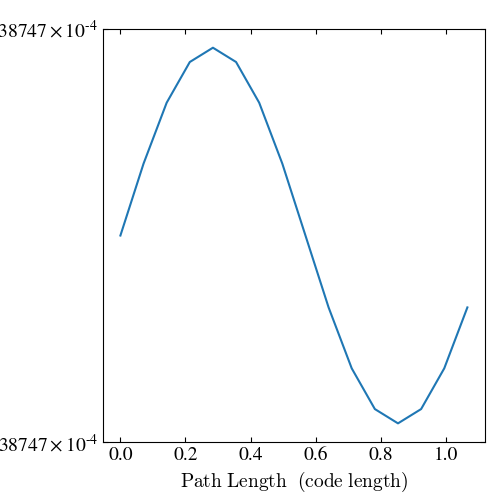

In [3]:
yt.LinePlot(ds, 'uy', (0,0,0), (1,0,0), 16)

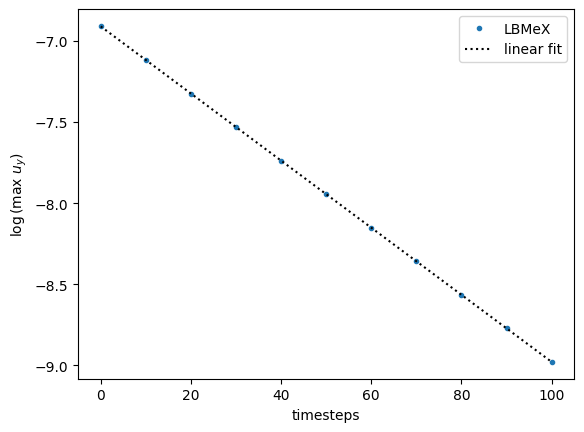

In [4]:
m, b = np.polyfit(times,np.log(us[:,1]),1)

plt.plot(times,np.log(us[:,1]), '.', label=r"LBMeX")
plt.plot(times,m*np.array(times)+b, 'k:', label="linear fit")
plt.ylabel(r"$\log\left(\max\ u_y\right)$")
plt.xlabel("timesteps")
plt.legend()
plt.show()

In [5]:
# data input manually from a few runs with different taus
tau = [ 1.0, 0.9, 0.8, 0.7, 0.6 ]
ls = [ -0.02570095, -0.02067913, -0.0155872, -0.01044244, -5.26044347e-03 ] 

nx = 16
k = 2*np.pi/nx
nu = 1./3.*(np.array(tau)-0.5)
lp = -nu*k**2

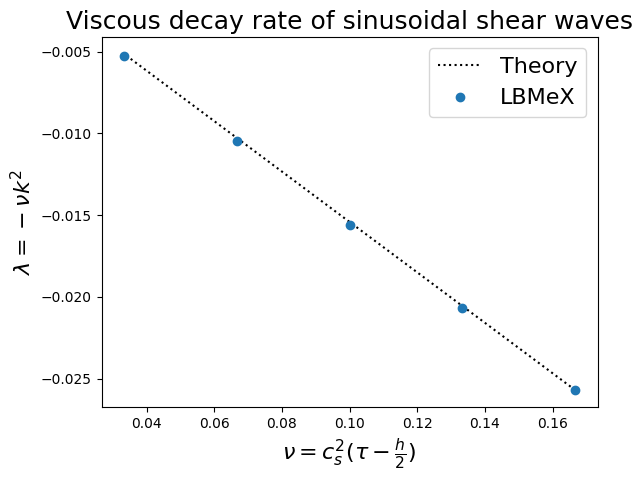

In [6]:
plt.plot(nu, lp, 'k:', label="Theory")
plt.plot(nu, ls, 'o', label='LBMeX')
plt.xlabel(r'$\nu=c_s^2(\tau-\frac{h}{2})$', size=16)
plt.ylabel(r'$\lambda=-\nu k^2$', size=16)
plt.title("Viscous decay rate of sinusoidal shear waves", size=18)
plt.legend(fontsize=16)
plt.show()

## Introducing fluctuations

### Fluctuations are added to non-conserved moments during collisions

\begin{equation}
m_k^{neq,*} = \gamma m_k^{neq} + r_k
\end{equation}

To maintain detailed balance:

\begin{equation}
\left\langle r_k^2 \right\rangle = \frac{\rho k_BT}{c_s^2} \left(1-\gamma^2\right) b_k
\end{equation}

### Lattice level fluctuations are _not_ hydrodynamic fluctuations

##### From Chapman-Enskog expansion

\begin{equation}
-Q = \Pi - \Pi^{eq} + \frac{1}{2} \left( \Pi^* - \Pi \right)
= \frac{1}{2} \left( \Pi^{*,neq} + \Pi^{neq} \right)
\end{equation}

\begin{align}
%\Pi^*_{\alpha\beta} - \Pi_{\alpha\beta} &= \rho c_s^2 \left(\partial_\alpha u_\beta + \partial_\beta u_\alpha \right) \\
\Pi^*_{\alpha\beta} - \Pi^{eq}_{\alpha\beta} &= \gamma \left( \Pi_{\alpha\beta} - \Pi^{eq}_{\alpha\beta} \right) + R\\
\Pi_{\alpha\beta} - \Pi^{eq}_{\alpha\beta} &= - \frac{\rho c_s^2}{1-\gamma} \left(\partial_\alpha u_\beta + \partial_\beta u_\alpha \right) + \frac{1}{1-\gamma} R
\end{align}

\begin{equation}
Q = \frac{\rho c_s^2}{2} \frac{1+\gamma}{1-\gamma} \left(\partial_\alpha u_\beta + \partial_\beta u_\alpha \right) + \frac{1}{1-\gamma} R
\end{equation}

\begin{equation}
\left\langle Q^2 \right\rangle = \frac{\rho k_BT}{c_s^2} \tilde{b}_k \frac{1-\gamma^2}{(1-\gamma)^2} \sim 2 \eta k_B T \frac{\tilde{b}_k}{c_s^4}
\end{equation}

### "Measuring" the fluctuating stress in LB

Chapman-Enskog says measure this:
\begin{equation}
Q = \frac{1}{2} \left( \Pi^{neq,*} + \Pi^{neq} \right) = \frac{1}{2} (1+\gamma) \Pi^{neq} + \frac{1}{2}R
\end{equation}

However, numerical observations indicate that, when measured instantaneously, the variance of $\Pi^{neq}$ and $\Pi^{neq,*}$ is the _lattice level_ variance (see $\left\langle r_k^2 \right\rangle$ above). Therefore

\begin{equation}
\left\langle Q^2 \right\rangle = \frac{1}{2} \left[ (1+\gamma)^2 + 1 \right ]
\end{equation}
_calculation SNAFU_
\begin{equation}
\left\langle Q^2 \right\rangle = \frac{1}{2} \frac{\rho k_BT}{c_s^2}(1-\gamma^2) \tilde{b}_k
\end{equation}

it deviates from the _hydrodynamic_ correlations by a factor $\frac{1-\gamma}{2}$.

The correct hydrodynamic correlations are obtained by multiplying the measured fluctuations by $\frac{2}{1+\gamma}$.

Confirmed numerically:

In [7]:
ts = yt.load('structure_factor/plt_SF_mag?????????');
ds = ts[-1];
print(ds.current_time)

1000.0 code_time


In [8]:
from mpl_toolkits.axes_grid1 import AxesGrid

fig = plt.figure()

# See http://matplotlib.org/mpl_toolkits/axes_grid/api/axes_grid_api.html
# These choices of keyword arguments produce a four panel plot that includes
# four narrow colorbars, one for each plot.  Axes labels are only drawn on the
# bottom left hand plot to avoid repeating information and make the plot less
# cluttered.
grid = AxesGrid(
    fig,
    (0.075, 0.075, 0.85, 0.85),
    nrows_ncols=(3, 3),
    axes_pad=1.0,
    label_mode="1",
    share_all=True,
    cbar_location="right",
    cbar_mode="each",
    cbar_size="3%",
    cbar_pad="0%",
)

fields = [
    ('boxlib', 'struct_fact_ux_ux'),
    ('boxlib', 'struct_fact_ux_uy'),
    ('boxlib', 'struct_fact_ux_uz'),
    ('boxlib', 'struct_fact_ux_uy'),
    ('boxlib', 'struct_fact_uy_uy'),
    ('boxlib', 'struct_fact_uy_uz'),
    ('boxlib', 'struct_fact_ux_uz'),
    ('boxlib', 'struct_fact_uy_uz'),
    ('boxlib', 'struct_fact_uz_uz'),
]
#fields = ds.field_list

# Create the plot.  Since SlicePlot accepts a list of fields, we need only
# do this once.
p = yt.SlicePlot(ds, 2, fields)

# Velocity is going to be both positive and negative, so let's make these
# slices use a linear colorbar scale
#p.set_log(("gas", "velocity_x"), False)
#p.set_log(("gas", "velocity_y"), False)
#p.zoom(2)

# For each plotted field, force the SlicePlot to redraw itself onto the AxesGrid
# axes.
for i, field in enumerate(fields):
    plot = p.plots[field]
    plot.figure = fig
    plot.axes = grid[i].axes
    plot.cax = grid.cbar_axes[i]

# Finally, redraw the plot on the AxesGrid axes.
p._setup_plots()

plt.show()

yt : [INFO     ] 2022-06-17 18:18:36,449 xlim = -201.061930 201.061930
yt : [INFO     ] 2022-06-17 18:18:36,450 ylim = -201.061930 201.061930
yt : [INFO     ] 2022-06-17 18:18:36,450 xlim = -201.061930 201.061930
yt : [INFO     ] 2022-06-17 18:18:36,451 ylim = -201.061930 201.061930
yt : [INFO     ] 2022-06-17 18:18:36,452 Making a fixed resolution buffer of (('boxlib', 'struct_fact_ux_ux')) 800 by 800
yt : [INFO     ] 2022-06-17 18:18:36,463 Making a fixed resolution buffer of (('boxlib', 'struct_fact_ux_uy')) 800 by 800
yt : [INFO     ] 2022-06-17 18:18:36,470 Making a fixed resolution buffer of (('boxlib', 'struct_fact_ux_uz')) 800 by 800
yt : [INFO     ] 2022-06-17 18:18:36,478 Making a fixed resolution buffer of (('boxlib', 'struct_fact_uy_uy')) 800 by 800
yt : [INFO     ] 2022-06-17 18:18:36,485 Making a fixed resolution buffer of (('boxlib', 'struct_fact_uy_uz')) 800 by 800
yt : [INFO     ] 2022-06-17 18:18:36,493 Making a fixed resolution buffer of (('boxlib', 'struct_fact_uz_u

In [9]:
tau = 0.75
nu = 1/3*(tau-0.5)
f = (2*tau)**-1
corr_names = [ 'rho_rho', 'ux_ux', 'uy_uy', 'uz_uz', 'pxx_pxx', 'pyy_pyy', 'pzz_pzz', 'pxy_pxy', 'pxz_pxz', 'pyz_pyz' ]
corr_expected = [ 3.0, 1.0, 1.0, f*4*nu, f*4*nu, f*4*nu, f*2*nu, f*2*nu, f*2*nu ]
cs = []
for name in corr_names:
    cs.append(ds.r[:,:,:].mean('struct_fact_'+name).value)
cs = np.array(cs)
pos = np.arange(len(corr_names))

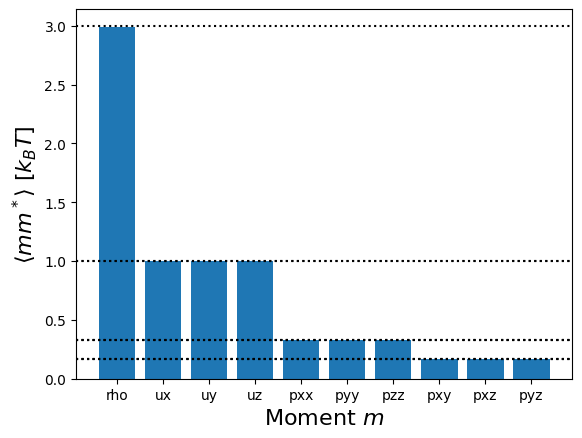

In [10]:
plt.bar(pos,cs)
plt.xticks(pos,map(lambda n: n.split('_')[0], corr_names))
for c in corr_expected:
    plt.axhline(y=c, c='k', ls=':')
plt.ylabel(r'$\langle m m^* \rangle$ [$k_B T$]', size=16)
plt.xlabel('Moment $m$', size=16)
plt.show()

### Time correlation functions

This remains a bit unsatisfying, so another test is to look at time correlations (underway).

\begin{equation}
\left\langle \Pi(t)\Pi(t+t') \right\rangle
\end{equation}

Green-Kubo relation
\begin{equation}
\eta = \frac{V}{k_B T} \int_0^\infty \left\langle \Pi_{xy}(0) \Pi_{xy}(t) \right\rangle \mathrm{d}t
\end{equation}

In [11]:
tc = yt.load('plt_TC?????')[-1]
cs = []
for field in tc.field_list:
    cs.append(tc.r[...].mean(field[1]).value)
cs = np.array(cs)

plt.plot(cs[:20],'.-')
plt.show()

yt : [INFO     ] 2022-06-17 18:18:39,931 Parameters: current_time              = 1000.0
yt : [INFO     ] 2022-06-17 18:18:39,932 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2022-06-17 18:18:39,933 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-17 18:18:39,934 Parameters: domain_right_edge         = [1. 1. 1.]


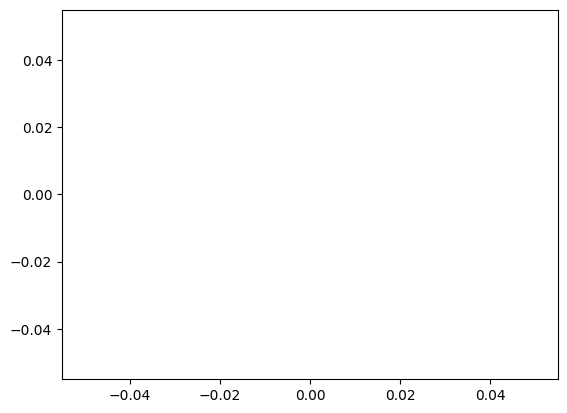

In [12]:
kT = 1e-6/9
eta = np.sum(cs)/kT
eta

In [13]:
# results for ncorr=100 nsteps=1000 @ 43b8ba0
tau = [ 0.6, 0.7, 0.75, 0.8, 0.9, 1.0, 1.1, 1.2, 1.25 ]
eta = [ 0.0448667519038987, 0.07754033602753309, 0.09068138822648218, 0.10221223717763152, 0.12149993866909059, 
       0.13699486442209038, 0.14971590559456613, 0.16034619387137658, 0.16503176590490784 ]
nu = 1/3*(np.array(tau)-0.5)

plt.plot(tau, eta, 'o', label='LBMeX')
plt.plot(tau, nu, 'k:', label=r'$\nu=c_s^2\left(\tau-\frac{h}{2}\right)$')
plt.title(r"Green-Kubo viscosity $\eta = \frac{V}{k_BT} \int_0^\infty \left\langle \Pi_{xy}(0) \Pi_{xy}(t) \right\rangle \mathrm{d}t$")
plt.ylabel(r"$\eta$")
plt.xlabel(r"$\tau$")
plt.legend();

nan